##  NVIDIA Company Current Stock Market Price Predictions

In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## import the dataset

In [3]:
dataset=pd.read_csv("NVIDIA Stock Price History.csv")
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,7/7/2025,158.24,158.20,159.31,157.34,140.14M,-0.69%
1,7/3/2025,159.34,158.37,160.98,157.77,143.72M,1.33%
2,7/2/2025,157.25,152.98,157.60,152.97,171.22M,2.58%
3,7/1/2025,153.30,156.29,157.20,151.49,213.14M,-2.97%
4,6/30/2025,157.99,158.40,158.66,155.96,194.58M,0.15%


In [4]:
# check the dataset type

In [5]:
dataset.shape

(5004, 7)

In [6]:
## check the information of the dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5004 non-null   object 
 1   Price     5004 non-null   float64
 2   Open      5004 non-null   float64
 3   High      5004 non-null   float64
 4   Low       5004 non-null   float64
 5   Vol.      5004 non-null   object 
 6   Change %  5004 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.8+ KB


In [8]:
## check the null values of the dataset

In [9]:
dataset.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

## Data Preprocessing

In [10]:
## convert the object types columns to  numerical format

In [11]:
dataset['date(MM/DD/YYYY)'] = dataset['Date'].str.replace('/', '').astype(int)
dataset['date(MM/DD/YYYY)'].head()

0     772025
1     732025
2     722025
3     712025
4    6302025
Name: date(MM/DD/YYYY), dtype: int32

In [12]:
## chekck the information of the dataset again

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5004 non-null   object 
 1   Price             5004 non-null   float64
 2   Open              5004 non-null   float64
 3   High              5004 non-null   float64
 4   Low               5004 non-null   float64
 5   Vol.              5004 non-null   object 
 6   Change %          5004 non-null   object 
 7   date(MM/DD/YYYY)  5004 non-null   int32  
dtypes: float64(4), int32(1), object(3)
memory usage: 293.3+ KB


In [14]:
dataset['Change %'].head()

0    -0.69%
1     1.33%
2     2.58%
3    -2.97%
4     0.15%
Name: Change %, dtype: object

In [15]:
dataset['Change %'] = dataset['Change %'].astype(str).str.replace('%', '').astype(float)
dataset['Change %'].head()

0   -0.69
1    1.33
2    2.58
3   -2.97
4    0.15
Name: Change %, dtype: float64

In [16]:
dataset['Vol.'].head()

0    140.14M
1    143.72M
2    171.22M
3    213.14M
4    194.58M
Name: Vol., dtype: object

In [17]:
dataset['Vol.'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5004 entries, 0 to 5003
Series name: Vol.
Non-Null Count  Dtype 
--------------  ----- 
5004 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [18]:
dataset['Vol.'].value_counts()

Vol.
1.09B      14
1.11B      12
1.02B      12
1.14B      12
1.10B      12
           ..
703.51M     1
525.21M     1
747.64M     1
824.31M     1
510.48M     1
Name: count, Length: 4485, dtype: int64

In [19]:
def convert_volume(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
        else:
            return pd.to_numeric(value, errors='coerce')  # for pure numbers
    return value

dataset['Vol'] = dataset['Vol.'].apply(convert_volume)


In [20]:
dataset['Vol'].head()

0    140140000.0
1    143720000.0
2    171220000.0
3    213140000.0
4    194580000.0
Name: Vol, dtype: float64

In [21]:
## Print the dataset

In [22]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,date(MM/DD/YYYY),Vol
0,7/7/2025,158.24,158.20,159.31,157.34,140.14M,-0.69,772025,140140000.0
1,7/3/2025,159.34,158.37,160.98,157.77,143.72M,1.33,732025,143720000.0
2,7/2/2025,157.25,152.98,157.60,152.97,171.22M,2.58,722025,171220000.0
3,7/1/2025,153.30,156.29,157.20,151.49,213.14M,-2.97,712025,213140000.0
4,6/30/2025,157.99,158.40,158.66,155.96,194.58M,0.15,6302025,194580000.0


In [23]:
## drop the unnecessary columns  or duplicate columns

In [24]:
dataset_new=dataset.drop(['Date','Vol.'], axis=1)
dataset_new.head()

,Price,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,158.24,158.20,159.31,157.34,-0.69,772025,140140000.0
1,159.34,158.37,160.98,157.77,1.33,732025,143720000.0
2,157.25,152.98,157.60,152.97,2.58,722025,171220000.0
3,153.30,156.29,157.20,151.49,-2.97,712025,213140000.0
4,157.99,158.40,158.66,155.96,0.15,6302025,194580000.0


In [25]:
## Sperate the target column and  independent features

In [26]:
x=dataset_new.drop('Price',axis=1)
x.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,158.20,159.31,157.34,-0.69,772025,140140000.0
1,158.37,160.98,157.77,1.33,732025,143720000.0
2,152.98,157.60,152.97,2.58,722025,171220000.0
3,156.29,157.20,151.49,-2.97,712025,213140000.0
4,158.40,158.66,155.96,0.15,6302025,194580000.0


In [27]:
y=dataset_new['Price']
y.head()

0    158.24
1    159.34
2    157.25
3    153.30
4    157.99
Name: Price, dtype: float64

In [28]:
## scale the data using StandardScaler
from sklearn.preprocessing  import StandardScaler
std_scaler=StandardScaler()
std_scaled_data=std_scaler.fit_transform(x)
std_scaled_data

array([[ 4.64289089,  4.58865381,  4.7199883 , -0.03087937, -1.05525959,
        -0.93190952],
       [ 4.64835671,  4.64140729,  4.7341003 ,  0.00556343, -1.06540278,
        -0.92380929],
       [ 4.47505794,  4.53463678,  4.57657099,  0.02811468, -1.06793857,
        -0.86158686],
       ...,
       [-0.4422544 , -0.44251162, -0.44237827, -0.01843109, -0.92847631,
        -0.69607518],
       [-0.44193288, -0.44219573, -0.44237827, -0.37925097, -0.93101211,
        -0.47245905],
       [-0.4422544 , -0.44219573, -0.44237827,  0.43259376, -0.9335479 ,
        -0.09396562]])

In [29]:
## convert the scaled data into pandas dataframe
scaled_data_pd=pd.DataFrame(std_scaled_data, columns=x.keys())
scaled_data_pd.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,4.642891,4.588654,4.719988,-0.030879,-1.055260,-0.931910
1,4.648357,4.641407,4.734100,0.005563,-1.065403,-0.923809
2,4.475058,4.534637,4.576571,0.028115,-1.067939,-0.861587
3,4.581481,4.522001,4.527999,-0.072013,-1.070474,-0.766737
4,4.649321,4.568121,4.674699,-0.015725,0.347036,-0.808732


## Explotary Data Analysis (EDA)

In [30]:
## Check the correlation
dataset_corr=dataset_new.corr()
dataset_corr

,Price,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
Price,1.000000,0.999567,0.999786,0.999832,0.008894,-0.009247,-0.176473
Open,0.999567,1.000000,0.999842,0.999773,0.008325,-0.008672,-0.176166
High,0.999786,0.999842,1.000000,0.999747,0.008306,-0.009540,-0.175391
Low,0.999832,0.999773,0.999747,1.000000,0.008927,-0.008520,-0.177346
Change %,0.008894,0.008325,0.008306,0.008927,1.000000,-0.009798,-0.011353
date(MM/DD/YYYY),-0.009247,-0.008672,-0.009540,-0.008520,-0.009798,1.000000,-0.038931
Vol,-0.176473,-0.176166,-0.175391,-0.177346,-0.011353,-0.038931,1.000000


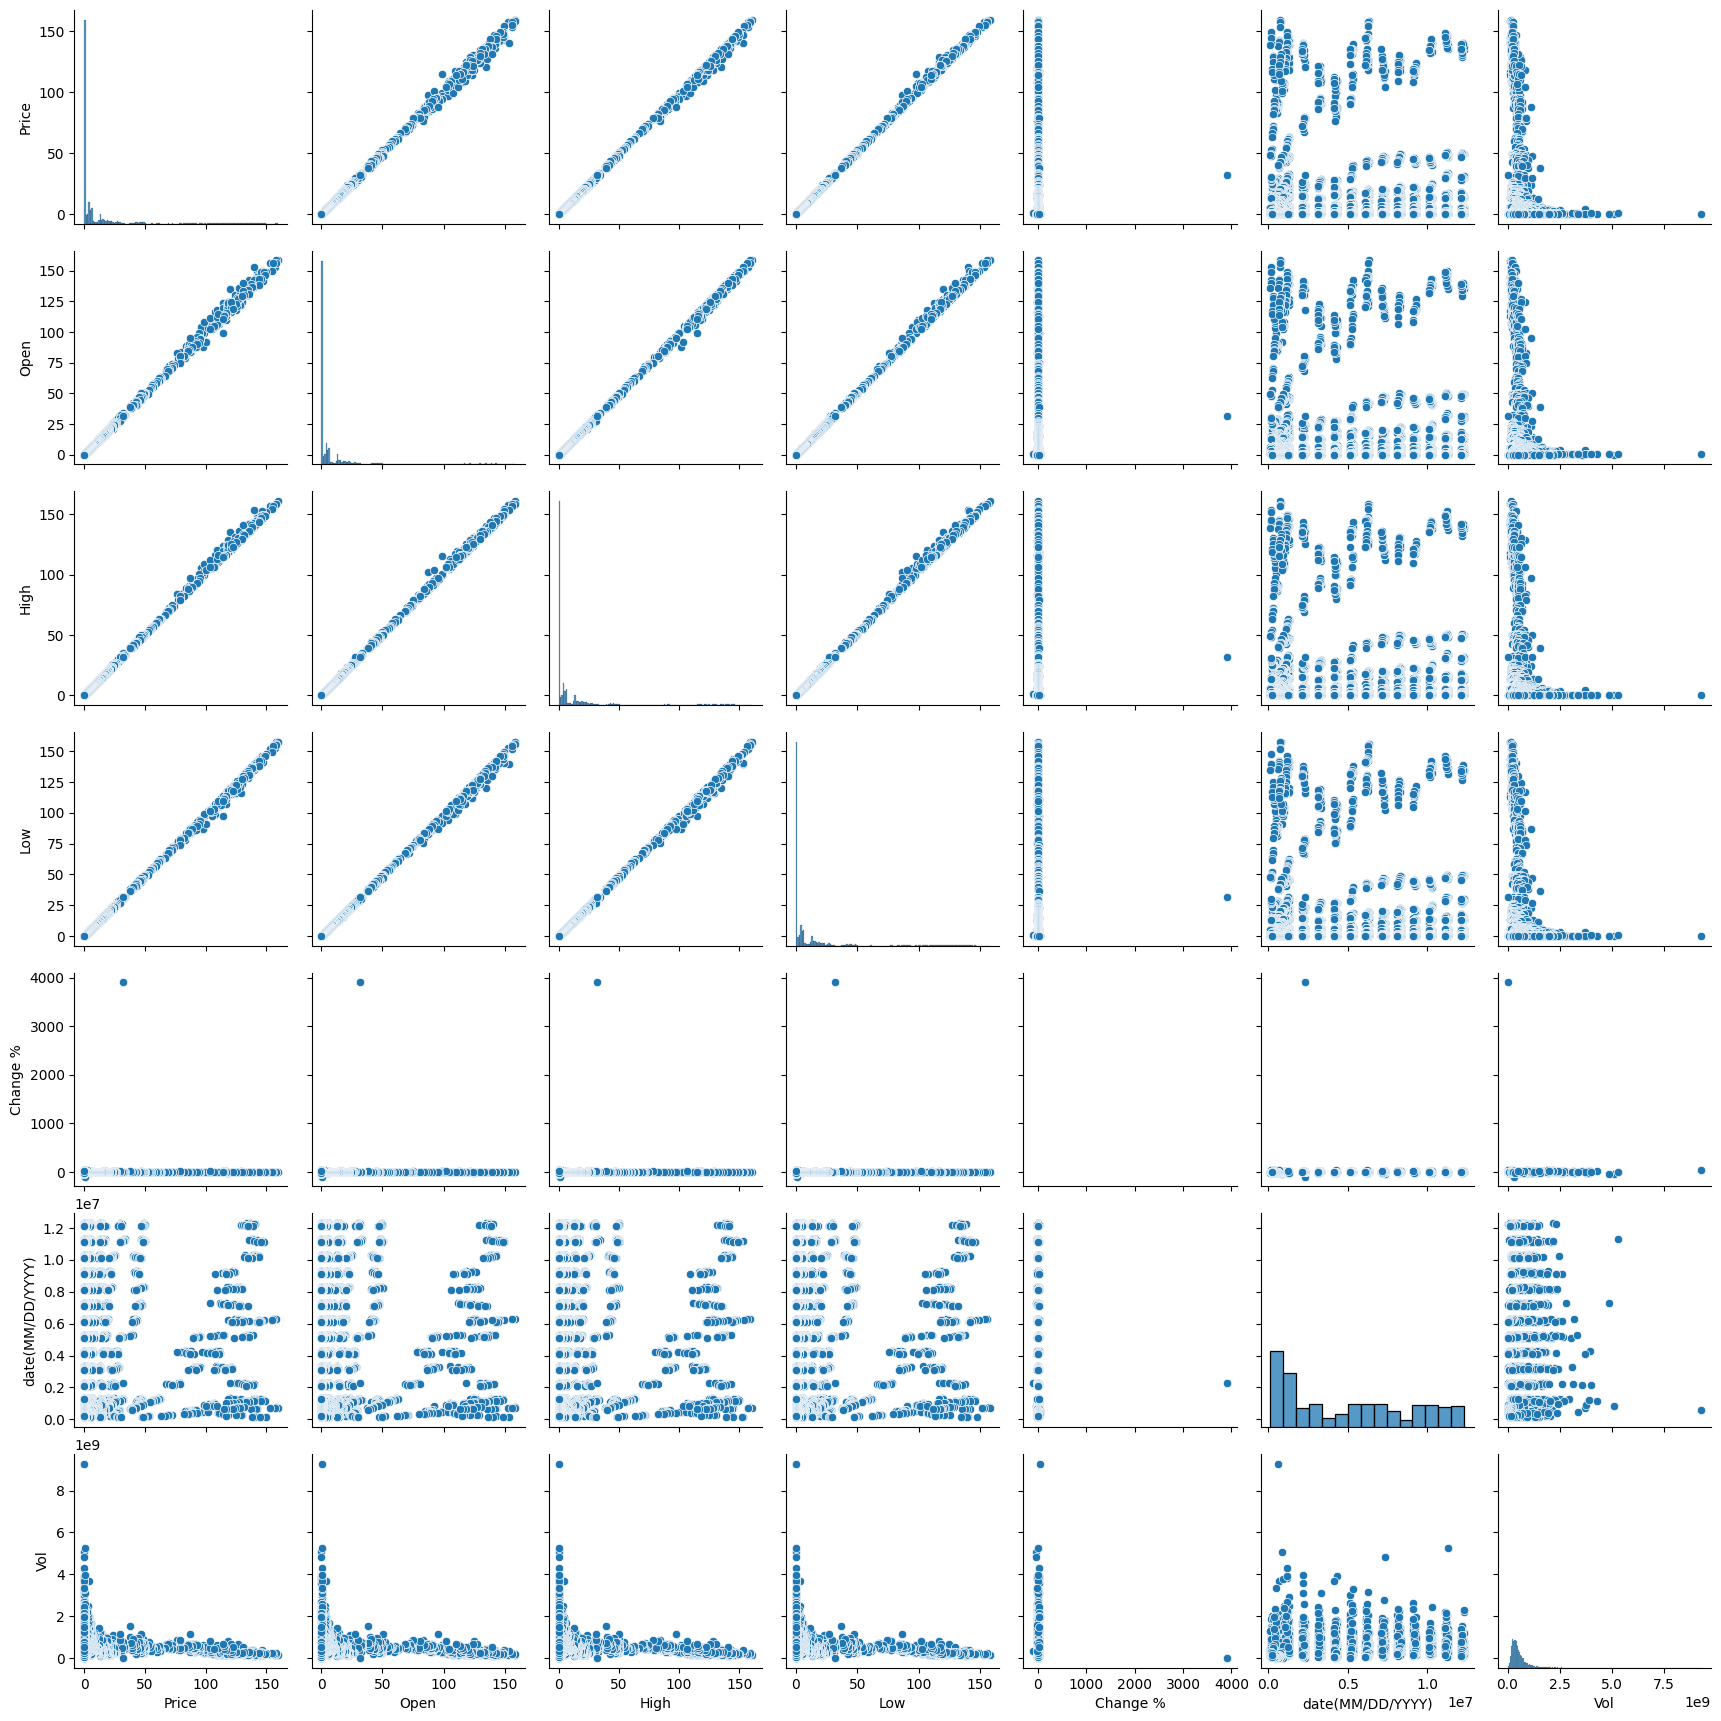

In [31]:
## plot the dataset
sns.pairplot(dataset_new)

In [32]:
## plot the price vs Open in scatterplot

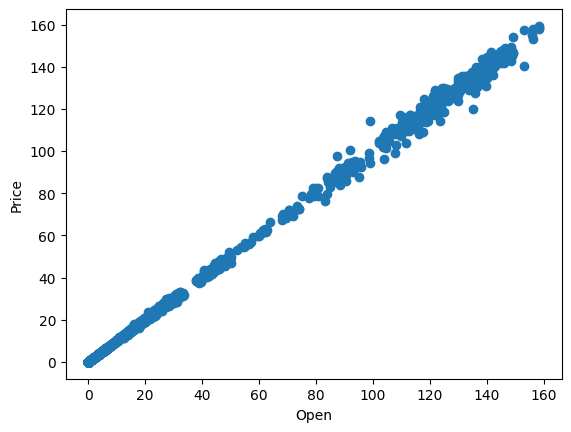

In [33]:
plt.scatter(dataset_new['Open'], dataset_new['Price'])
plt.xlabel('Open')
plt.ylabel('Price')
plt.show()

In [34]:
## Plot the Price vs  High in  scatterplot

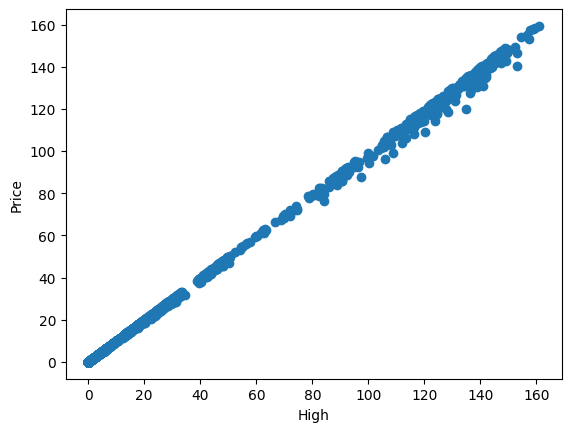

In [35]:
plt.scatter(dataset_new['High'],dataset_new['Price'])
plt.xlabel('High')
plt.ylabel('Price')

plt.show()

In [36]:
## Plot the Price vs Low in scatterplot

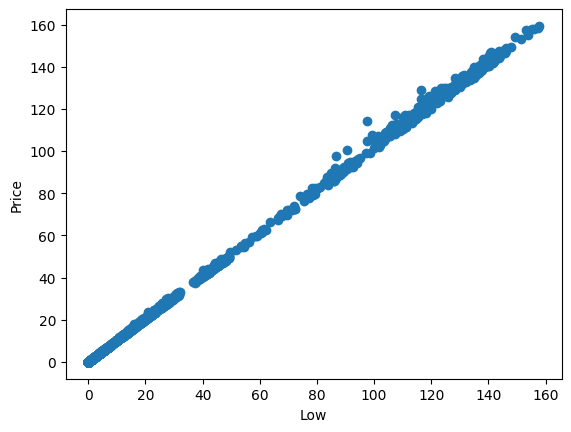

In [37]:
plt.scatter(dataset_new['Low'],dataset_new['Price'])
plt.xlabel('Low')
plt.ylabel('Price')
plt.show()

In [38]:
## Plot the  Price vs Change % in scatterplot

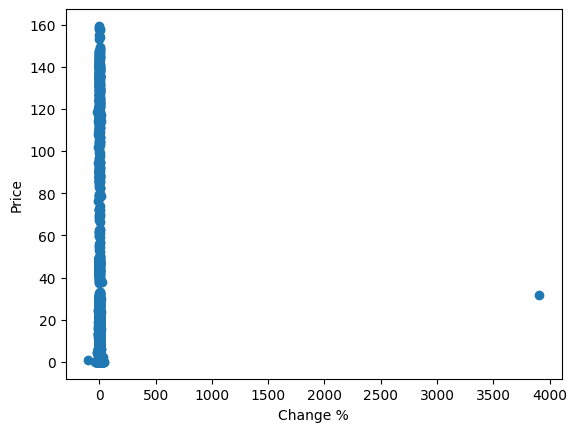

In [39]:
plt.scatter(dataset_new['Change %'],dataset_new['Price'])
plt.xlabel('Change %')
plt.ylabel('Price')
plt.show()

In [40]:
## Plot the  Price vs date(MM/DD/YYYY) in scatterplot

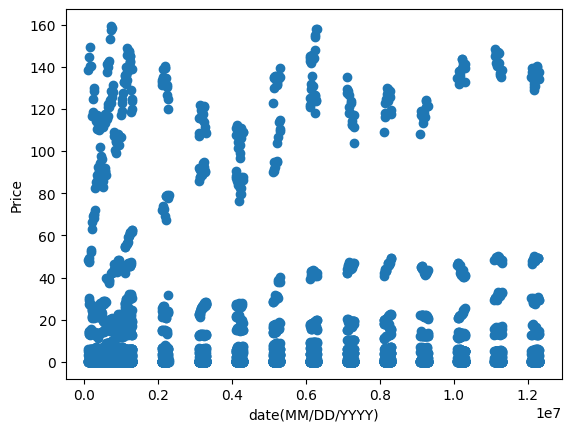

In [41]:
plt.scatter(dataset_new['date(MM/DD/YYYY)'], dataset_new['Price'])
plt.xlabel('date(MM/DD/YYYY)')
plt.ylabel('Price')
plt.show()

In [42]:
## Plot the Price vs Vol in scatterplot

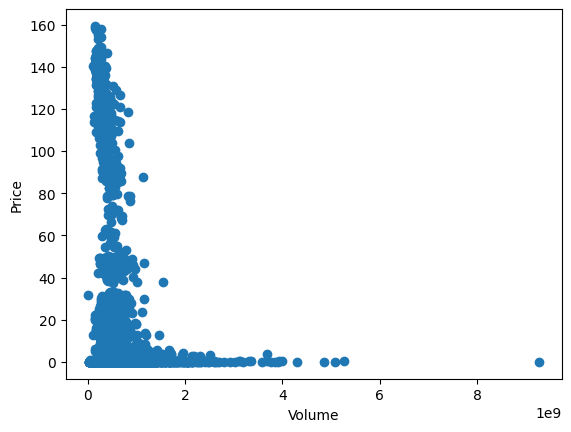

In [43]:
plt.scatter(dataset_new['Vol'],dataset_new['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [44]:
## Regression plot for Price vs Open

<Axes: xlabel='Open', ylabel='Price'>

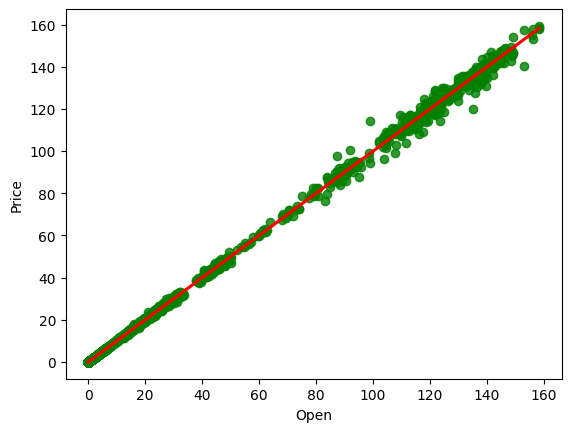

In [45]:
sns.regplot(x="Open",y="Price", data=dataset_new, scatter_kws={'color':'green'}, line_kws={'color':'red'})

In [46]:
## Regression plot for Price vs High

<Axes: xlabel='High', ylabel='Price'>

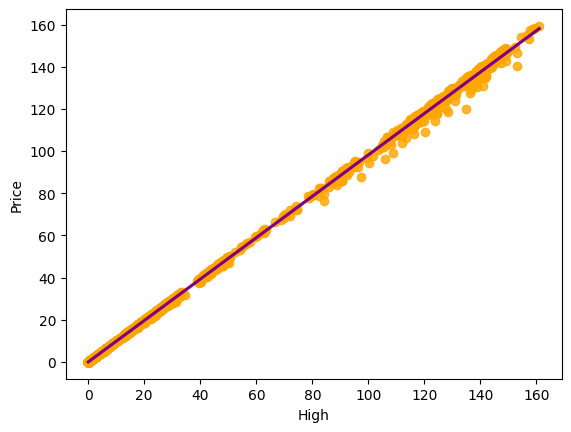

In [47]:
sns.regplot(x='High',y='Price',data=dataset_new, scatter_kws={'color':'orange'}, line_kws={'color':'purple'})

In [48]:
## Regression plot for Price vs Low

<Axes: xlabel='Low', ylabel='Price'>

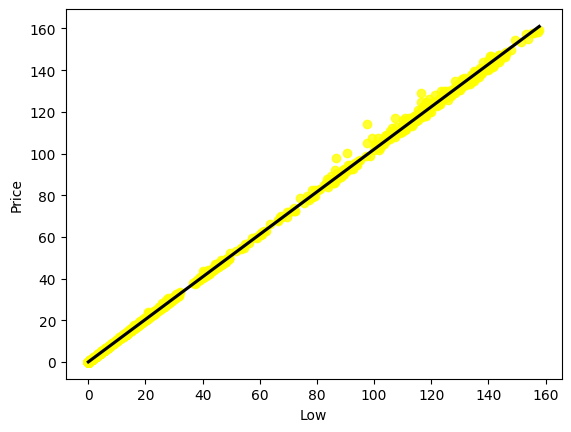

In [49]:
sns.regplot(x='Low',y='Price', data=dataset_new, scatter_kws={'color':'yellow'}, line_kws={'color':'black'})

In [50]:
## Regression plot for Price vs Change %

<Axes: xlabel='Change %', ylabel='Price'>

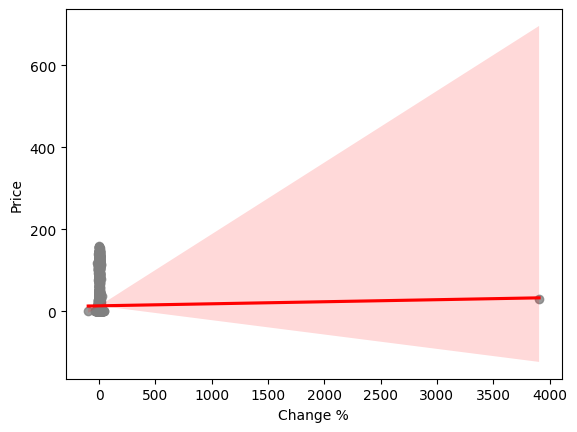

In [51]:
sns.regplot(x='Change %',y='Price', data=dataset_new, scatter_kws={'color':'grey'}, line_kws={'color':'red'})

In [52]:
## Regression plot for Price vs date(MM/DD/YYYY)

<Axes: xlabel='date(MM/DD/YYYY)', ylabel='Price'>

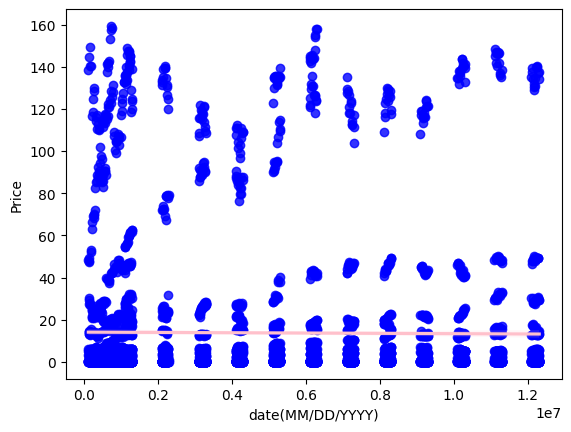

In [53]:
sns.regplot(x='date(MM/DD/YYYY)', y='Price', data=dataset_new,scatter_kws={'color':'blue'}, line_kws={'color':'pink'})

In [54]:
## Regression plot for Price vs Volume

<Axes: xlabel='Vol', ylabel='Price'>

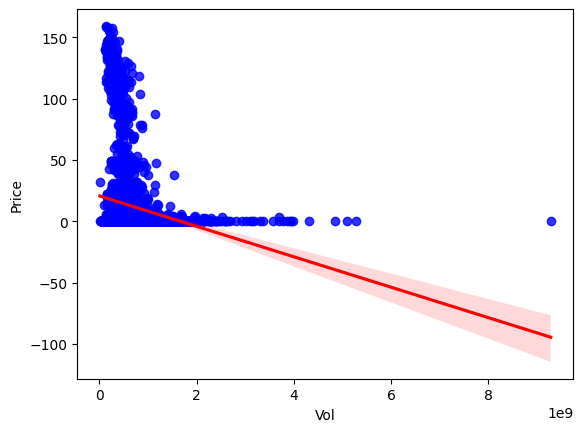

In [55]:
sns.regplot(x='Vol', y='Price', data=dataset_new, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

## Split the dataset into train and test set

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_data_pd,y,test_size=0.2, shuffle=False)

In [57]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((4003, 6), (1001, 6), (4003,), (1001,))

In [58]:
X_train.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,4.642891,4.588654,4.719988,-0.030879,-1.055260,-0.931910
1,4.648357,4.641407,4.734100,0.005563,-1.065403,-0.923809
2,4.475058,4.534637,4.576571,0.028115,-1.067939,-0.861587
3,4.581481,4.522001,4.527999,-0.072013,-1.070474,-0.766737
4,4.649321,4.568121,4.674699,-0.015725,0.347036,-0.808732


In [59]:
X_test.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
4003,-0.440325,-0.440616,-0.440737,-0.198841,-0.956369,3.389405
4004,-0.440325,-0.440616,-0.440409,-0.018431,-0.958905,0.809911
4005,-0.440325,-0.440616,-0.440409,-0.018431,-0.961441,0.734317
4006,-0.440004,-0.440300,-0.440409,-0.018431,-0.963976,0.681416
4007,-0.440325,-0.440616,-0.440409,-0.018431,-0.971584,0.851815


In [60]:
y_train.head()

0    158.24
1    159.34
2    157.25
3    153.30
4    157.99
Name: Price, dtype: float64

In [61]:
y_test.head()

4003    0.09
4004    0.10
4005    0.10
4006    0.10
4007    0.10
Name: Price, dtype: float64

## Model Training

In [76]:
## Linear Regression model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [77]:
## Get the  coefficient

In [78]:
print(lr_model.coef_)

[-2.11971236e+01  2.61680668e+01  2.61175015e+01  2.46802554e-03
  1.10035112e-03  5.51006657e-04]


In [79]:
## Get the interceft

In [80]:
print(lr_model.intercept_)

13.796902194242964


## Model Testing

In [63]:
## make the [redictions using X_test data

In [64]:
X_test.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
4003,-0.440325,-0.440616,-0.440737,-0.198841,-0.956369,3.389405
4004,-0.440325,-0.440616,-0.440409,-0.018431,-0.958905,0.809911
4005,-0.440325,-0.440616,-0.440409,-0.018431,-0.961441,0.734317
4006,-0.440004,-0.440300,-0.440409,-0.018431,-0.963976,0.681416
4007,-0.440325,-0.440616,-0.440409,-0.018431,-0.971584,0.851815


In [74]:
predictions=lr_model.predict(X_test)
predictions

array([0.08982177, 0.09741432, 0.09736988, ..., 0.03648403, 0.03716487,
       0.04618956])

In [75]:
from sklearn.metrics  import r2_score
score=r2_score(y_test,predictions)
print(score)

0.99751171930738


In [67]:
X_test.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
4003,-0.440325,-0.440616,-0.440737,-0.198841,-0.956369,3.389405
4004,-0.440325,-0.440616,-0.440409,-0.018431,-0.958905,0.809911
4005,-0.440325,-0.440616,-0.440409,-0.018431,-0.961441,0.734317
4006,-0.440004,-0.440300,-0.440409,-0.018431,-0.963976,0.681416
4007,-0.440325,-0.440616,-0.440409,-0.018431,-0.971584,0.851815


In [68]:
# 158.20	159.31	157.34	-0.69	772025	140140000.0
#4.642891	4.588654	4.719988	-0.030879	-1.055260	-0.931910
#7/2/2025	157.25	152.98	157.6	152.97	171,220,000	2.58%
#4.648357	4.641407	4.734100	0.005563	-1.065403	-0.923809
# 145.56,   147.96, 145.5, 2.59%, 6242025,187570000.0, 
user_data =[[152.98	,157.60	,152.97	,2.58,722025, 171220000.0]]
scaled_data=std_scaler.transform(user_data)
print(scaled_data)

[[ 4.47505794  4.53463678  4.57657099  0.02811468 -1.06793857 -0.86158686]]


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
predictions=lr_model.predict(scaled_data)
predictions[0]

C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


157.12824312665546